# Decision Tree classifier

### Today your task is to get familiar with decision tree classifier - simple, but powerful case of discrete math usage.


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

### General idea
#### You are expected to write a quite simple, yet good core logic of decision tree classifier class. Additionaly, you need to test your results and write down a report on what you've done, which principles used and explain the general process.


#### Hopefully, you have already learned what is decision tree classifier and how it work. For better understanding, and in case if something is still unclear for you, here are some useful links on basics of DTC:
- https://towardsdatascience.com/decision-tree-from-scratch-in-python-46e99dfea775
- https://towardsdatascience.com/decision-tree-algorithm-in-python-from-scratch-8c43f0e40173
- https://machinelearningmastery.com/implement-decision-tree-algorithm-scratch-python/
- https://anderfernandez.com/en/blog/code-decision-tree-python-from-scratch/

#### Also, for those interested to learn more about machine learning and particulary Desicion Trees - here is a great course on Coursera (you may be interested in the whole course or just this particular week):
- https://www.coursera.org/learn/advanced-learning-algorithms/home/week/4



![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

### Dataset
#### You can use Iris dataset for this task. It is a very popular dataset for machine learning and data science. It contains 150 samples of 3 different species of Iris flowers (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. 
Read more on this: https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html
https://en.wikipedia.org/wiki/Iris_flower_data_set
#### However, using more interesting and intricate datasets is much appreciated. You can use any dataset you want, but it should be a classification one. For example you can use breast cancer or wine datasets, which are also available in sklearn.datasets. Or you can use any other dataset you find interesting.
P.S. In case you are not sure if your dataset is suitable, feel free to ask assistants :).


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

In [44]:
# install the required packages

# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install graphviz
# !pip install scikit-learn

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [46]:
# scikit-learn package
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split

In [47]:
# iris = load_iris()
iris = load_breast_cancer()
iris
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [48]:
iris.data.shape

(569, 30)

This means that we have 150 entries (samples, infos about a flower). The columns being: Sepal Length, Sepal Width, Petal Length and Petal Width(features). Let's look at first two entries:

In [49]:
iris.data[0:2]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02]])

## To undestand data little bit better, let's plot some features

Text(0, 0.5, 'Sepal width')

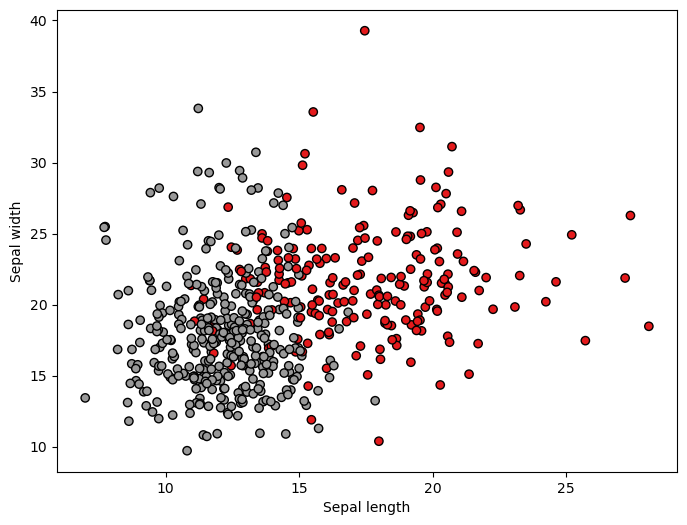

In [50]:
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

From this we can clearly see, that even basing on those two parameters, we can clearly divide (classify) out data into several groups. For this, we will use decision tree classifier: https://scikit-learn.org/stable/modules/tree.html#tree


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

### Example of usage

**Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression**. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.

In [51]:
clf = DecisionTreeClassifier()

In [52]:
X, y = iris.data, iris.target
X.shape, y.shape

((569, 30), (569,))

### Train / test split

We train our model using training dataset and evaluate its performance basing on the test dataset. Reason to use two separate datasets is that our model learns its parameters from data, thus test set allows us to check its possibilities on completely new data.

In [53]:
X, X_test, y, y_test = train_test_split(X, y, test_size= 0.20)

### Model learning

It learns its parameters (where it should split data and for what threshold value) basing on the training dataset. It is done by minimizing some cost function (e.g. Gini impurity or entropy).

In [54]:
clf = clf.fit(X, y)

### Visualization of produced tree

You do not need to understand this piece of code :)

In [55]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris")

'iris.pdf'

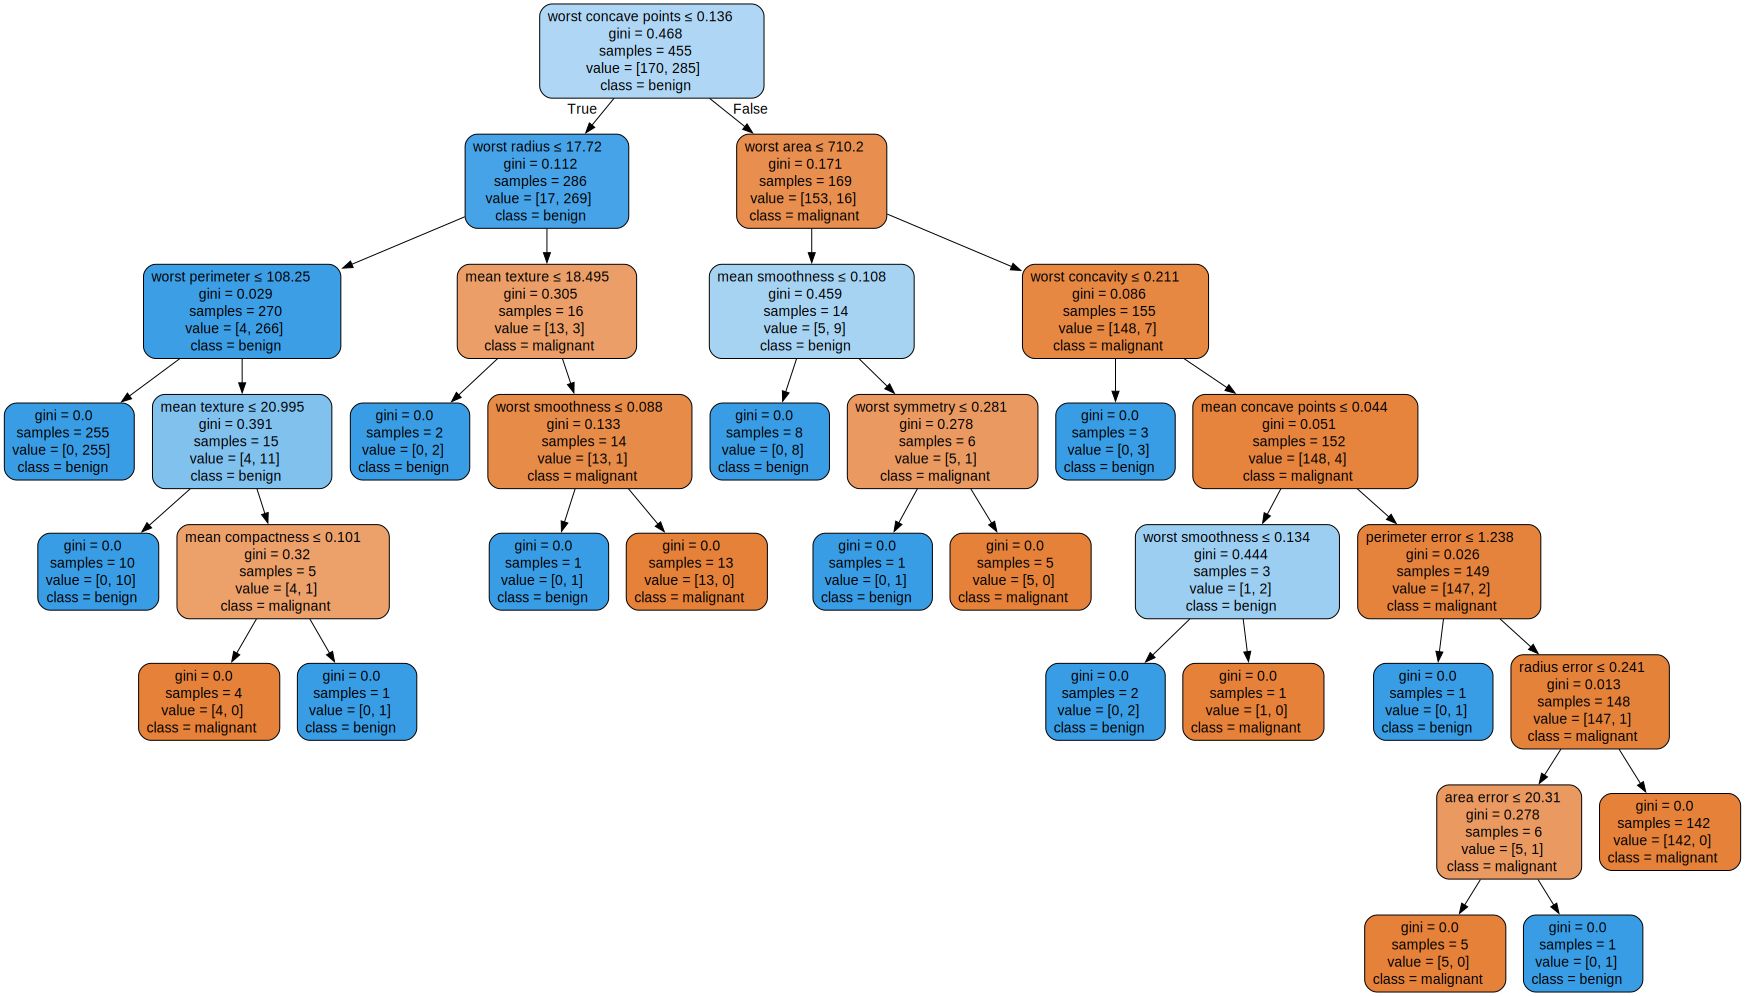

In [56]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=iris.feature_names,  
                     class_names=iris.target_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [57]:
X_test.shape

(114, 30)

### Prediction step

Now we can use our model to predict which type has a flower, basing on its parameters.

This is conducted basically via traversing the tree that you can see above.

In [58]:
predictions = clf.predict(X_test)

### We can also measure the accuracy of our model

In [59]:
sum(predictions == y_test) / len(y_test)

0.9210526315789473

To get clearer intuition about predicion, let's look at those X, that should be labeled to some flower

In [60]:
y_test

array([1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1])

Here you can traverse the tree above by yourself and make sure that prediction works

In [61]:
X_test[1]

array([1.390e+01, 1.662e+01, 8.897e+01, 5.994e+02, 6.828e-02, 5.319e-02,
       2.224e-02, 1.339e-02, 1.813e-01, 5.536e-02, 1.555e-01, 5.762e-01,
       1.392e+00, 1.403e+01, 3.308e-03, 1.315e-02, 9.904e-03, 4.832e-03,
       1.316e-02, 2.095e-03, 1.514e+01, 2.180e+01, 1.012e+02, 7.189e+02,
       9.384e-02, 2.006e-01, 1.384e-01, 6.222e-02, 2.679e-01, 7.698e-02])

In [62]:
clf.predict([X_test[1]])

array([1])


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Finally, it is your turn to write such classifier by yourself!

###  Gini impurity

Decision trees use the concept of Gini impurity to describe how “pure” a node is. A node is pure (G = 0) if all its samples belong to the same class, while a node with many samples from many different classes will have a Gini closer to 1.

$G = 1 - \sum_{k=1}^{n}p_{k}^2$

For example, if a node contains five samples, with two belonging to the first class (first flower), two of class 2, one of class 3 and none of class 4, then

$G = 1 - (\frac{2}{5})^2 - (\frac{2}{5})^2 - (\frac{1}{5})^2 = 0.64$

In [63]:
class Node:
    
    def __init__(self, X, y, gini):
        self.X = X
        self.y = y
        self.gini = gini
        self.feature_index = 0
        self.threshold = 0
        self.left = None
        self.right = None


In [64]:
# Implement a decision tree classifier
class MyDecisionTreeClassifier:
    
    def __init__(self, max_depth):
        self.max_depth = max_depth
    
    @staticmethod
    def gini(groups):
        '''
        A Gini score gives an idea of how good a split is by how mixed the
        classes are in the two groups created by the split.
        
        A perfect separation results in a Gini score of 0,
            whereas the worst case split that results in 50/50
            classes in each group result in a Gini score of 0.5
        (for a 2 class problem).
        '''
        
        total = sum(groups)
        
        return 1 - sum((p_k/total)**2 for p_k in groups)
                    
    def split_data(self, X, y) -> tuple[int, int]:
        
        # test all the possible splits in O(N*F) where N in number of samples
        # and F is number of features

        # return index and threshold value

        
        m = y.size
        if m <= 1:
            return None, None
        

        parent_num = [np.sum(y == c) for c in range(self.classes)]

        best_gini = self.gini(parent_num)

        best_ind, best_thr = None, None


        for ind in range(self.features):
            thresholds, classes = zip(*sorted(zip(X[:, ind], y)))
            left_num = [0] * self.classes
            right_num = parent_num[:]
            for i in range(1,m):
                cut = classes[i]

                left_num[cut] += 1
                right_num[cut] -= 1

                if thresholds[i] == thresholds[i-1]:
                    continue

                gini = (i * self.gini(left_num) + (m-i)*self.gini(right_num)) / m
                
                
                if gini < best_gini:
                    best_gini = gini
                    best_ind = ind
                    best_thr = (thresholds[i] + thresholds[i-1]) / 2
                    
        return best_ind, best_thr
                
    
    def build_tree(self, X, y, depth = 0):
        
        # create a root node
        
        # recursively split until max depth is not exeeced
        class_samples_num = [np.sum(y == i) for i in range(self.classes)]
        node = Node(
            X,
            np.argmax(class_samples_num),
            self.gini(class_samples_num),
        )

        if depth < self.max_depth:
            ind, thresh_hold = self.split_data(X, y)

            if ind is not None:
                X_left, y_left, X_right, y_right =[],[],[],[]
                for i, row in enumerate(X):
                    if row[ind] < thresh_hold:
                        X_left.append(row)
                        y_left.append(y[i])
                    else:
                        X_right.append(row)
                        y_right.append(y[i])
                    
                
                node.feature_index = ind
                node.threshold = thresh_hold
                        
                node.left = self.build_tree(np.array(X_left), np.array(y_left), depth + 1)
                node.right = self.build_tree(np.array(X_right), np.array(y_right), depth + 1)
                
        return node
            
        
    def fit(self, X, y):
        
        # basically wrapper for build tree / train
        self.classes = len(set(y))
        self.features = X.shape[1]
        self.tree = self.build_tree(X, y)
        
    
    def predict(self, X_test):
        
        # traverse the tree while there is a child
        # and return the predicted class for it, 
        # note that X_test can be a single sample or a batch

        classes = []

        for input in X_test:
            node = self.tree
            while node.left:
                if input[node.feature_index] < node.threshold:
                    node = node.left
                else:
                    node = node.right
            classes.append(node.y)
            
        return classes
        
    def evaluate(self, X_test, y_test):
        
        # return accuracy
        
        test = self.predict(X_test)

        return sum(test == y_test) / len(y_test)



my_clf = MyDecisionTreeClassifier(2)
my_clf.fit(X, y)
print(my_clf.evaluate(X_test, y_test))

0.9473684210526315


### For those who want to do it a little bit more complicated ;) (**optional**)
Consider also using some techniques to avoid overfitting, like pruning or setting a maximum depth for the tree.  You can also try to implement some other metrics, to measure the quality of a split and overall performance. Also, you can try to implement some other algorithms, like proper CART, ID3 or C4.5. You can find more information about them here: https://scikit-learn.org/stable/modules/tree.html#tree